# College Basketball Data Analysis

**Name:** Brayden Uglione

**Date:** 12/18/24

**Exercise:** Final Project

**Purpose:** This project analyzes a College Basketball Dataset to uncover insights related to team performance metrics, conference impacts, and trends in offensive efficiency.

## Data Cleaning

#### Import necessary libraries

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Import data

In [106]:
df1 = pd.read_csv('College Basketball Data/cbb14.csv')
df2 = pd.read_csv('College Basketball Data/cbb15.csv')
df3 = pd.read_csv('College Basketball Data/cbb16.csv')
df4 = pd.read_csv('College Basketball Data/cbb17.csv')
df5 = pd.read_csv('College Basketball Data/cbb18.csv')
df6 = pd.read_csv('College Basketball Data/cbb19.csv')
df7 = pd.read_csv('College Basketball Data/cbb20.csv')
df8 = pd.read_csv('College Basketball Data/cbb21.csv')
df9 = pd.read_csv('College Basketball Data/cbb22.csv')
df10 = pd.read_csv('College Basketball Data/cbb23.csv')

#### Get Rid of Unnecessary Columns and Rows

List dataframe names and unneeded columns

In [107]:
# ChatGPT, response to "How to make a list of pandas dataframes", OpenAI, November 30, 2024.
df_names = [f'df{i}' for i in range(1, 11)]

unneeded_columns = ['EFG_O', 'EFG_D', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'POSTSEASON', 'SEED']

Loop through each dataframe while removing unnecessary columns and conferences

In [108]:
# ChatGPT, response to "How to remove certain columns in a list of pandas dataframes", OpenAI, November 30, 2024.
for df_name in df_names:
    df = globals()[df_name]
    
    df.drop(columns=unneeded_columns, errors='ignore', inplace=True)
    
    df = df[df['CONF'].str[0].str.isupper()]
    
    globals()[df_name] = df

## Data Analysis

### Question 1: How does a college basketball team's conference affect its power rating?

Calculate average power rating for each conference

In [109]:
conf = df10.groupby('CONF')['BARTHAG'].mean().sort_values(ascending=False)

Plot power ratings for each conference

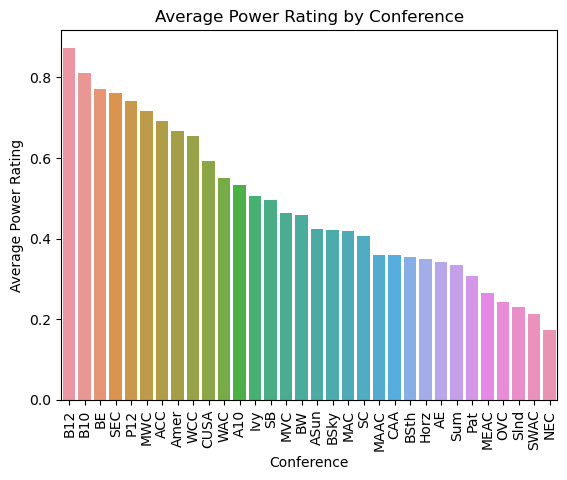

In [110]:
# ChatGPT, response to "How to make a bar graph using seaborn in python", OpenAI, December 10, 2024.
sns.barplot(x=conf.index, y=conf.values)
plt.title('Average Power Rating by Conference')
plt.xlabel('Conference')
plt.ylabel('Average Power Rating')
# ChatGPT, response to "How to rotate x-axis labels in matplotlib", OpenAI, December 10, 2024.
plt.xticks(rotation=90)
plt.show()

The top three conferences were the Big 12, Big Ten, and Big East, with the Northeast coming in dead last.

### Question 2: How has offensive efficiency changed over the past decade?

Calculate average offensive efficiency for each year's dataframe

In [111]:
yearly_adjoe = {
    2014: df1['ADJOE'].mean(),
    2015: df2['ADJOE'].mean(),
    2016: df3['ADJOE'].mean(),
    2017: df4['ADJOE'].mean(),
    2018: df5['ADJOE'].mean(),
    2019: df6['ADJOE'].mean(),
    2020: df7['ADJOE'].mean(),
    2021: df8['ADJOE'].mean(),
    2022: df9['ADJOE'].mean(),
    2023: df10['ADJOE'].mean()
}

Convert to pandas series

In [112]:
# ChatGPT, response to "How to convert a dictionary into a pandas series", OpenAI, December 10, 2024.
yearly_adjoe_series = pd.Series(yearly_adjoe)

Plot data

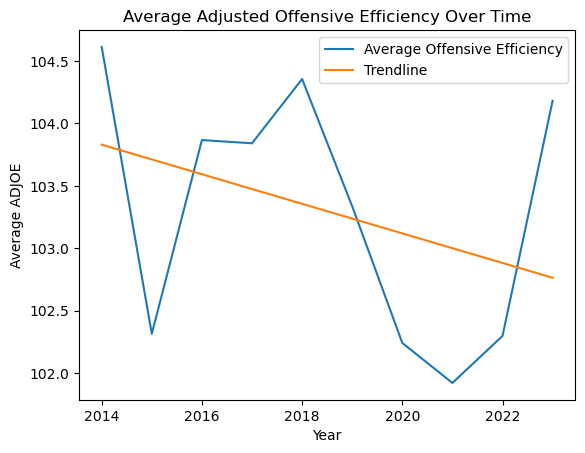

In [113]:
# ChatGPT, response to "How to plot a trendline in a matplotlib plot", OpenAI, December 10, 2024.
# ChatGPT, response to "How to create a legend in a matplotlib plot", OpenAI, December 10, 2024.
plt.plot(yearly_adjoe_series.index, yearly_adjoe_series.values, label='Average Offensive Efficiency')
plt.title('Average Adjusted Offensive Efficiency Over Time')
plt.xlabel('Year')
plt.ylabel('Average ADJOE')

z = np.polyfit(yearly_adjoe_series.index, yearly_adjoe_series.values, 1)
p = np.poly1d(z)
plt.plot(yearly_adjoe_series.index, p(yearly_adjoe_series.index), label='Trendline')

plt.legend()
plt.show()

It appears that offensive efficiency has decreased over the last decade. However it has overall been very inconsistent. 

### Question# 3: Which has a greater impact on winning: offense or defense?

Calculate winning percentage

In [114]:
df10['WinPct'] = df10['W'] / df10['G']

Calculate correlation between efficiency and winning percentage

In [115]:
offensive_correlation = abs(df10['ADJOE'].corr(df10['WinPct']))
defensive_correlation = abs(df10['ADJDE'].corr(df10['WinPct']))

Define plot labels and values

In [116]:
# ChatGPT, response to "How to create a bar plot in matplotlib", OpenAI, December 15, 2024.
labels = ['Offense', 'Defense']
correlations = [offensive_correlation, defensive_correlation]

Create bar plot

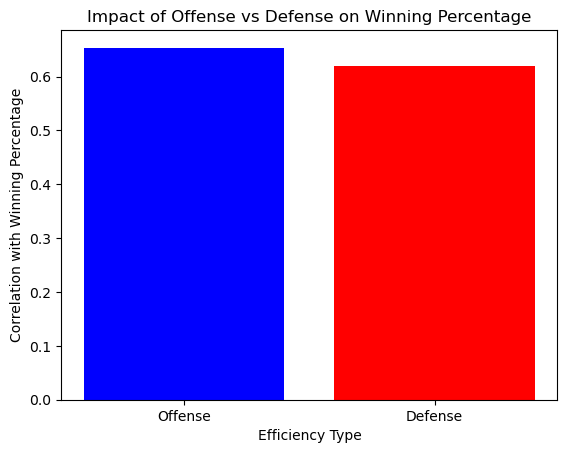

In [117]:
# ChatGPT, response to "How to create a bar plot in matplotlib", OpenAI, December 15, 2024.
plt.bar(labels, correlations, color=['blue', 'red'])
plt.xlabel('Efficiency Type')
plt.ylabel('Correlation with Winning Percentage')
plt.title('Impact of Offense vs Defense on Winning Percentage')
plt.show()

While offense and defense impact on winning to a very similar degree, it appears that offense has a slight edge and does impact winning more than defense.

### Question# 4: Do better teams less frequently turn over the ball?

Plot scatter plot and line of best fit

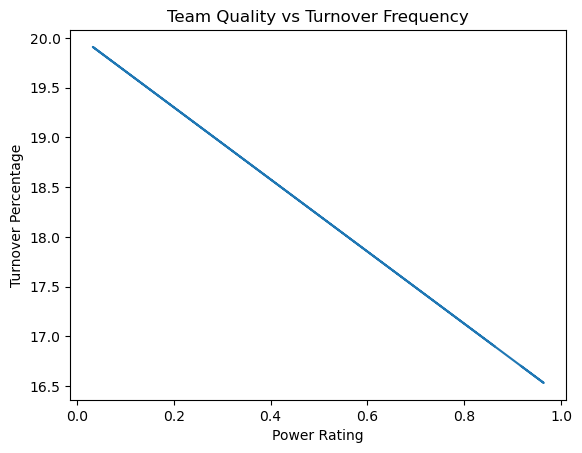

In [118]:
# ChatGPT, response to "How to edit the transparency of the points on a matplotlib scatter plot", OpenAI, December 15, 2024.
plt.xlabel('Power Rating')
plt.ylabel('Turnover Percentage')
plt.title('Team Quality vs Turnover Frequency')

# ChatGPT, response to "How to plot a trendline in a matplotlib scatter plot", OpenAI, December 15, 2024.
z = np.polyfit(df10['BARTHAG'], df10['TOR'], 1)
p = np.poly1d(z)
plt.plot(df10['BARTHAG'], p(df10['BARTHAG']))

plt.show()

As the power rating of a team increases, the turnover frequency decreases, indicating that better teams do in fact turnover the ball less.

### Question# 5: How does the speed of college basketball teams affect their offense?

Plot scatter plot and line of best fit

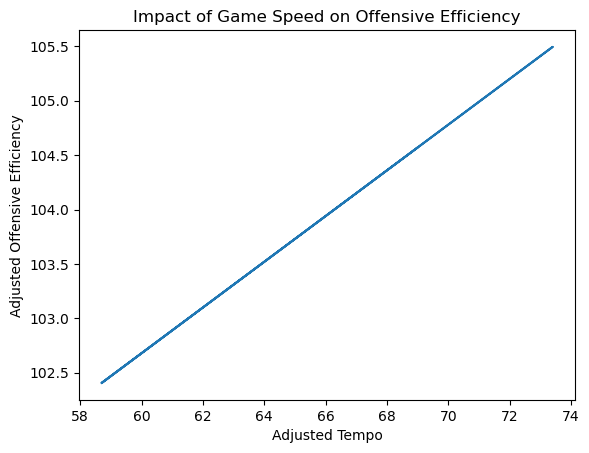

In [119]:
# ChatGPT, response to "How to edit the transparency of the points on a matplotlib scatter plot", OpenAI, December 15, 2024.
plt.xlabel('Adjusted Tempo')
plt.ylabel('Adjusted Offensive Efficiency')
plt.title('Impact of Game Speed on Offensive Efficiency')

# ChatGPT, response to "How to plot a trendline in a matplotlib scatter plot", OpenAI, December 15, 2024.
z = np.polyfit(df10['ADJ_T'], df10['ADJOE'], 1)
p = np.poly1d(z)
plt.plot(df10['ADJ_T'], p(df10['ADJ_T']))

plt.show()

Even though it is by a slim margin, teams that play at a faster tempo generally produce more efficient offense.